In [33]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [79]:
df_india = pd.read_csv("covid_19_india.csv")
df_individual = pd.read_csv("IndividualDetails.csv")
df_population = pd.read_csv("population_india_census2011.csv")
df_imcrt = pd.read_csv("ICMRTestingDetails.csv")
df_hospital_bed = pd.read_csv("HospitalBedsIndia.csv")
df_age_group = pd.read_csv("AgeGroupDetails.csv")

In [22]:
df_india['ConfirmedIndianNational'] = df_india.ConfirmedIndianNational.replace('-',0)
df_india['ConfirmedForeignNational'] = df_india.ConfirmedForeignNational.replace('-',0)
df_india['ConfirmedIndianNational']= df_india['ConfirmedIndianNational'].astype('int64')
df_india['ConfirmedForeignNational']= df_india['ConfirmedForeignNational'].astype('int64')

In [23]:
df_india['Total Cases'] = df_india['Confirmed']
df_india['Active Cases'] = df_india['Total Cases'] - df_india['Cured'] - df_india['Deaths']
df_india["Date"] = pd.to_datetime(df_india["Date"],infer_datetime_format=True,dayfirst=True)

In [24]:
recent_date = df_india['Date'].max()

In [25]:
covid_19_india = df_india[df_india['Date']==recent_date]
covid_19_india[["Date",'State/UnionTerritory','Confirmed','Cured','Deaths']]


,Date,State/UnionTerritory,Confirmed,Cured,Deaths
2846,2020-06-10,Andaman and Nicobar Islands,33,33,0
2847,2020-06-10,Andhra Pradesh,5070,2802,77
2848,2020-06-10,Arunachal Pradesh,57,1,0
2849,2020-06-10,Assam,2937,1085,4
2850,2020-06-10,Bihar,5459,2864,32
2851,2020-06-10,Chandigarh,323,286,5
2852,2020-06-10,Chhattisgarh,1240,386,6
2853,2020-06-10,Dadar Nagar Haveli,22,2,0
2854,2020-06-10,Delhi,31309,11861,905
2855,2020-06-10,Goa,359,67,0


In [26]:
df_india['State/UnionTerritory'].nunique()

37

In [10]:
df_india.shape

(2882, 11)

In [11]:
df_india=df_india.drop(["Sno"],axis=1)

In [12]:
df_india.isnull().sum()

Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
Total Cases                 0
Active Cases                0
dtype: int64

In [13]:
df_india_date_wise = df_india.groupby(['Date','State/UnionTerritory','Total Cases'])['Cured','Deaths','Active Cases','Confirmed'] \
            .sum().reset_index().sort_values('Total Cases',ascending = False)

In [14]:

recent_date = df_india['Date'].max()
print(recent_date)

2020-06-10 00:00:00


In [15]:
df_india_date_wise

,Date,State/UnionTerritory,Total Cases,Cured,Deaths,Active Cases,Confirmed
2866,2020-06-10,Maharashtra,90787,42638,3289,44860,90787
2830,2020-06-09,Maharashtra,88528,40975,3169,44384,88528
2794,2020-06-08,Maharashtra,85975,39314,3060,43601,85975
2758,2020-06-07,Maharashtra,82968,37390,2969,42609,82968
2722,2020-06-06,Maharashtra,80229,35156,2849,42224,80229
...,...,...,...,...,...,...,...
1080,2020-04-18,Nagaland,0,0,0,0,0
1146,2020-04-20,Nagaland,0,0,0,0,0
1113,2020-04-19,Nagaland,0,0,0,0,0
1179,2020-04-21,Nagaland,0,0,0,0,0


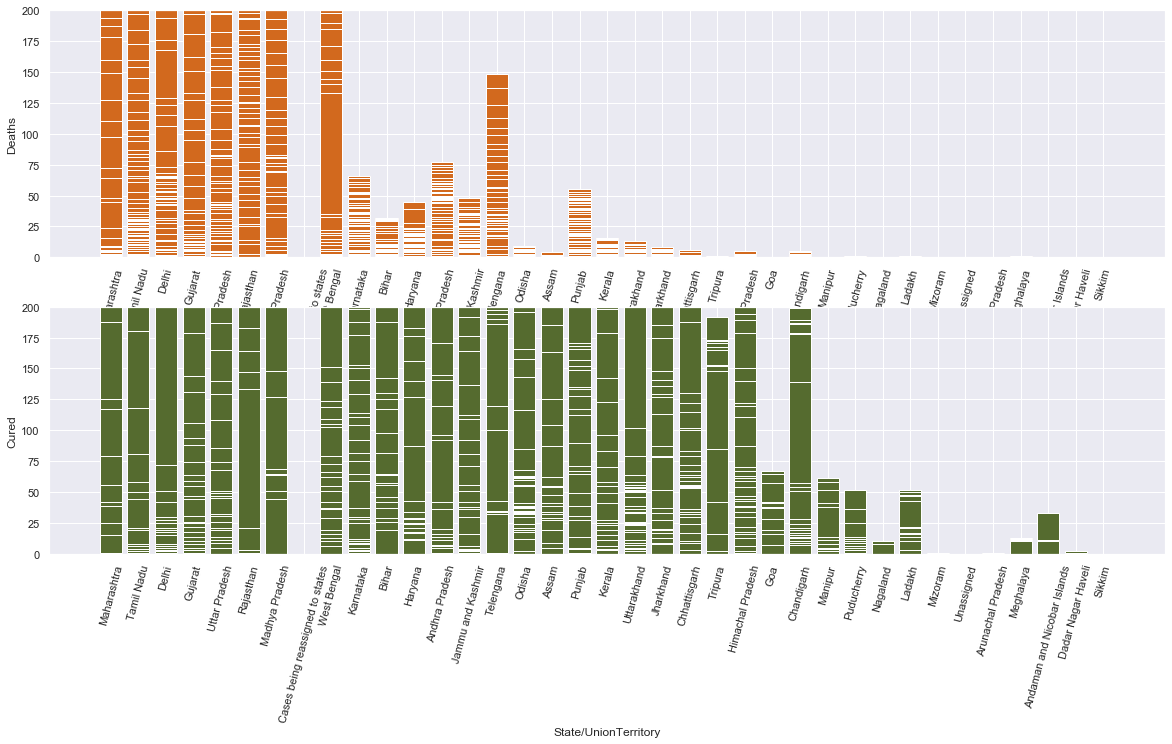

In [105]:
plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
plt.bar(df_india_date_wise["State/UnionTerritory"],df_india_date_wise["Deaths"],color='chocolate')
# plt.bar(df_india["Date"],df_india["ConfirmedIndianNational"])
plt.xticks(rotation=75)
plt.ylim(0, 200)
plt.xlabel("State/UnionTerritory")
plt.ylabel("Deaths")

plt.subplot(2,1,2)
plt.bar(df_india_date_wise["State/UnionTerritory"],df_india_date_wise["Cured"],color='darkolivegreen')
plt.xlabel("State/UnionTerritory")
plt.ylabel("Cured")
plt.ylim(0, 200)

plt.xticks(rotation=75)
plt.savefig('D:\Covid\image_1.png')

plt.show()


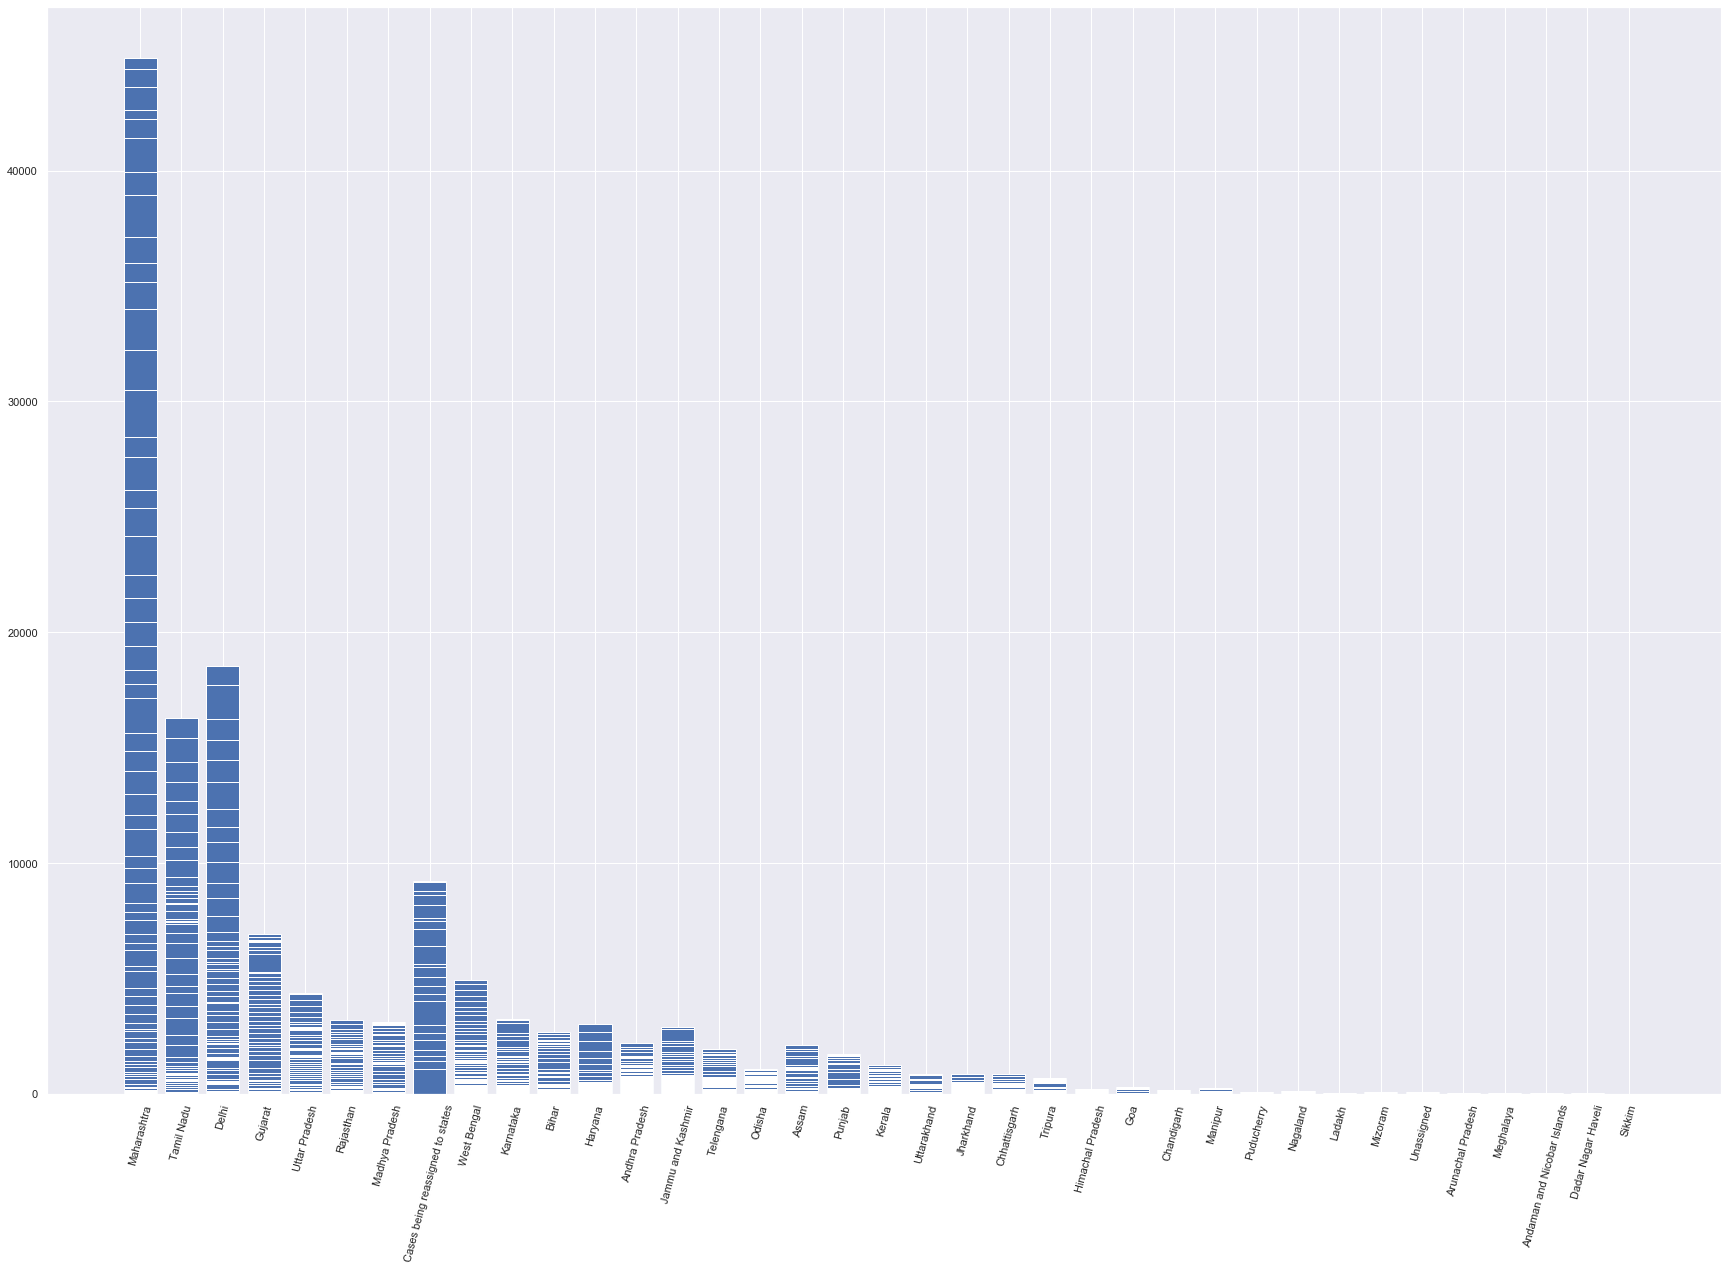

In [106]:
plt.figure(figsize=(30,20))
plt.bar(df_india_date_wise["State/UnionTerritory"],df_india_date_wise["Active Cases"])
plt.xticks(rotation=75)
plt.savefig('D:\Covid\image_2.png')

plt.show()

In [39]:
tmp = df_india_date_wise.groupby(['Date'])["Active Cases","Cured","Deaths","State/UnionTerritory","Confirmed"].sum().reset_index()

In [40]:
tmp.tail(10)

,Date,Active Cases,Cured,Deaths,Confirmed
123,2020-06-01,93322,91819,5394,190535
124,2020-06-02,97581,95527,5598,198706
125,2020-06-03,101497,100303,5815,207615
126,2020-06-04,106737,104107,6075,216919
127,2020-06-05,110960,109462,6348,226770
128,2020-06-06,115942,114073,6642,236657
129,2020-06-07,120406,119293,6929,246628
130,2020-06-08,125381,124095,7135,256611
131,2020-06-09,129917,129215,7466,266598
132,2020-06-10,133632,135206,7745,276583


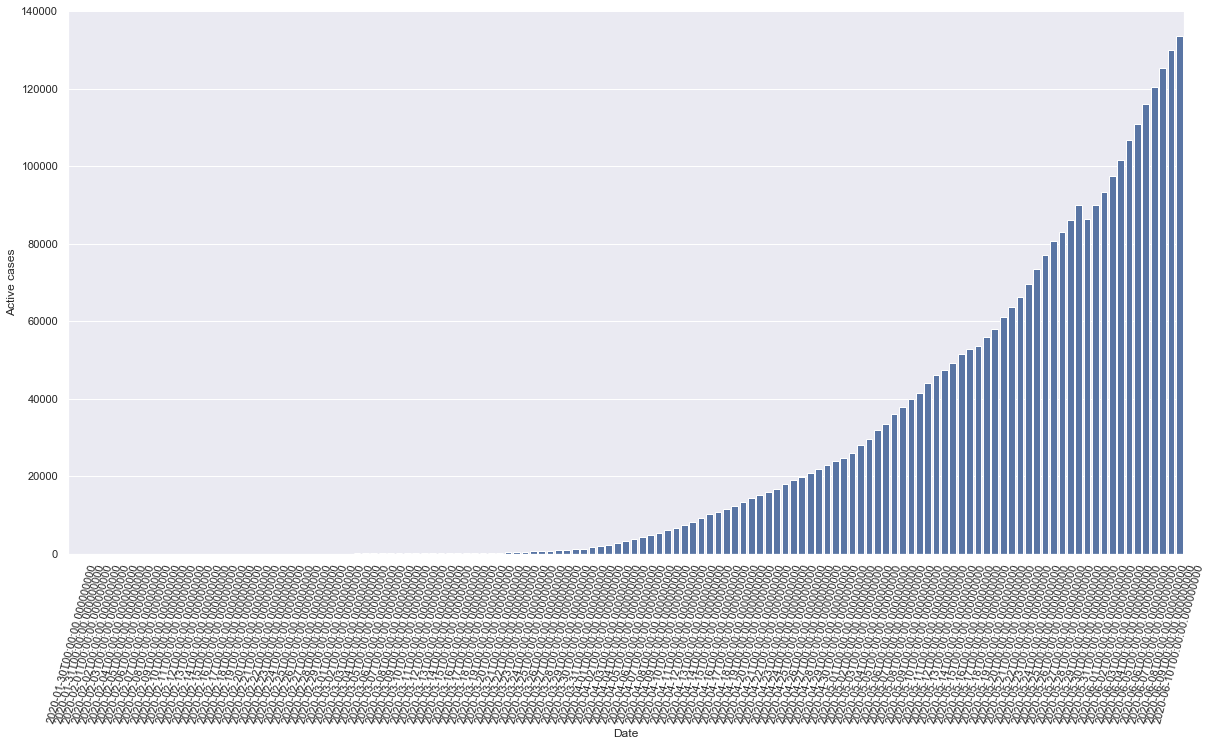

In [107]:
plt.figure(figsize=(20,10))
sns.barplot(tmp["Date"],tmp["Active Cases"],color="b")
plt.xticks(rotation=75)
plt.xlabel("Date")
plt.ylabel("Active cases")
plt.savefig('D:\Covid\image_3.png')

plt.show()

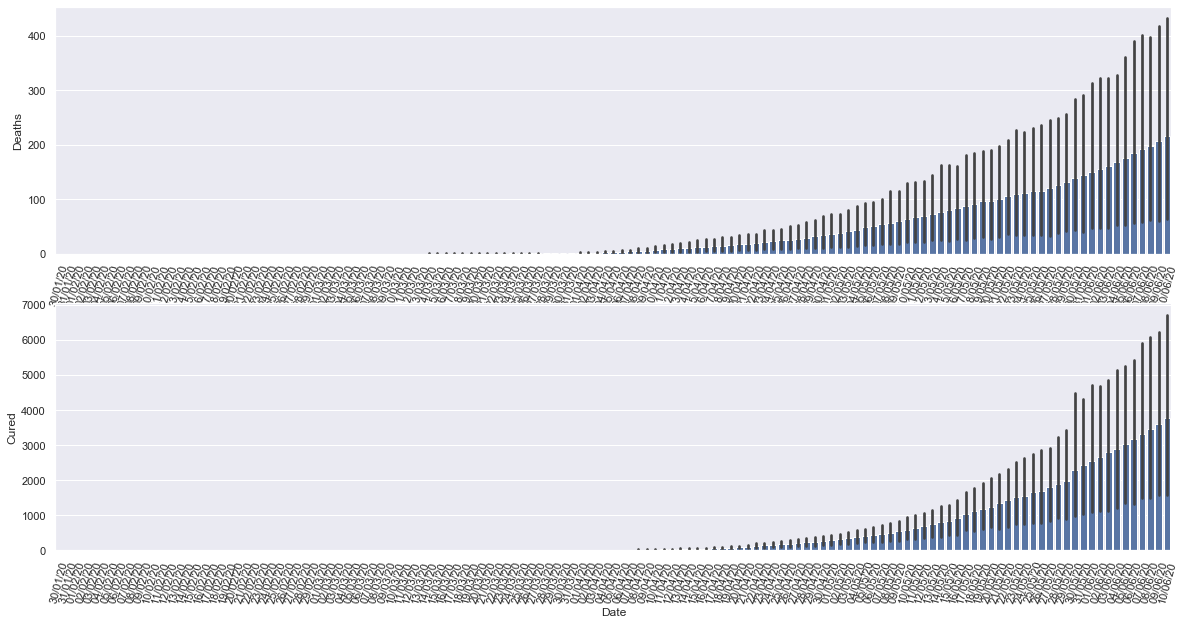

In [108]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.barplot(df_india["Date"],df_india["Deaths"],color="b")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.xticks(rotation=75)
# indices = range(len(df_india["Date"].unique()))
# width = np.min(np.diff(indices))/3.
plt.subplot(2,1,2)
sns.barplot(df_india["Date"],df_india["Cured"],color="b")

plt.xlabel("Date")
plt.ylabel("Cured")

plt.xticks(rotation=75)
plt.savefig('D:\Covid\image_4.png')


plt.show()

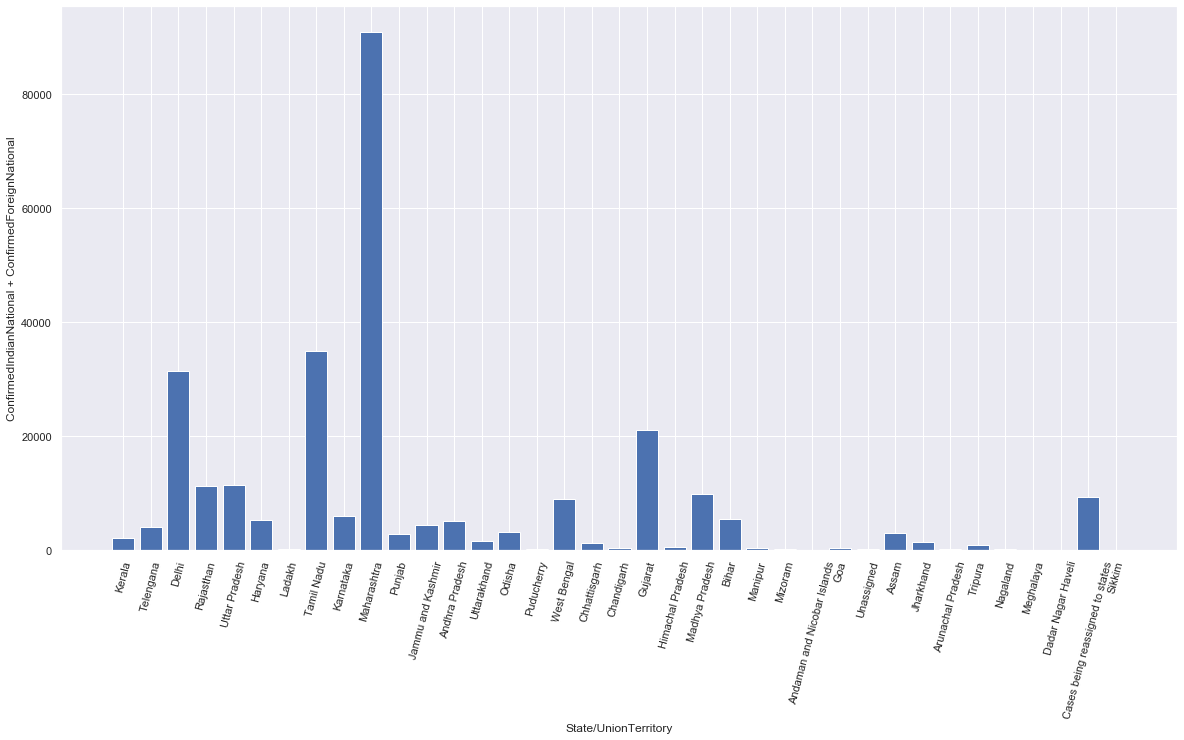

In [109]:
plt.figure(figsize=(20,10))
plt.bar(df_india["State/UnionTerritory"],df_india["Confirmed"])
plt.xlabel("State/UnionTerritory")
plt.ylabel("ConfirmedIndianNational + ConfirmedForeignNational")
plt.xticks(rotation=75)
plt.savefig('D:\Covid\image_5.png')

plt.show()

In [44]:
df_india_date_wise["Date"] = pd.to_datetime(df_india_date_wise["Date"],infer_datetime_format=True)

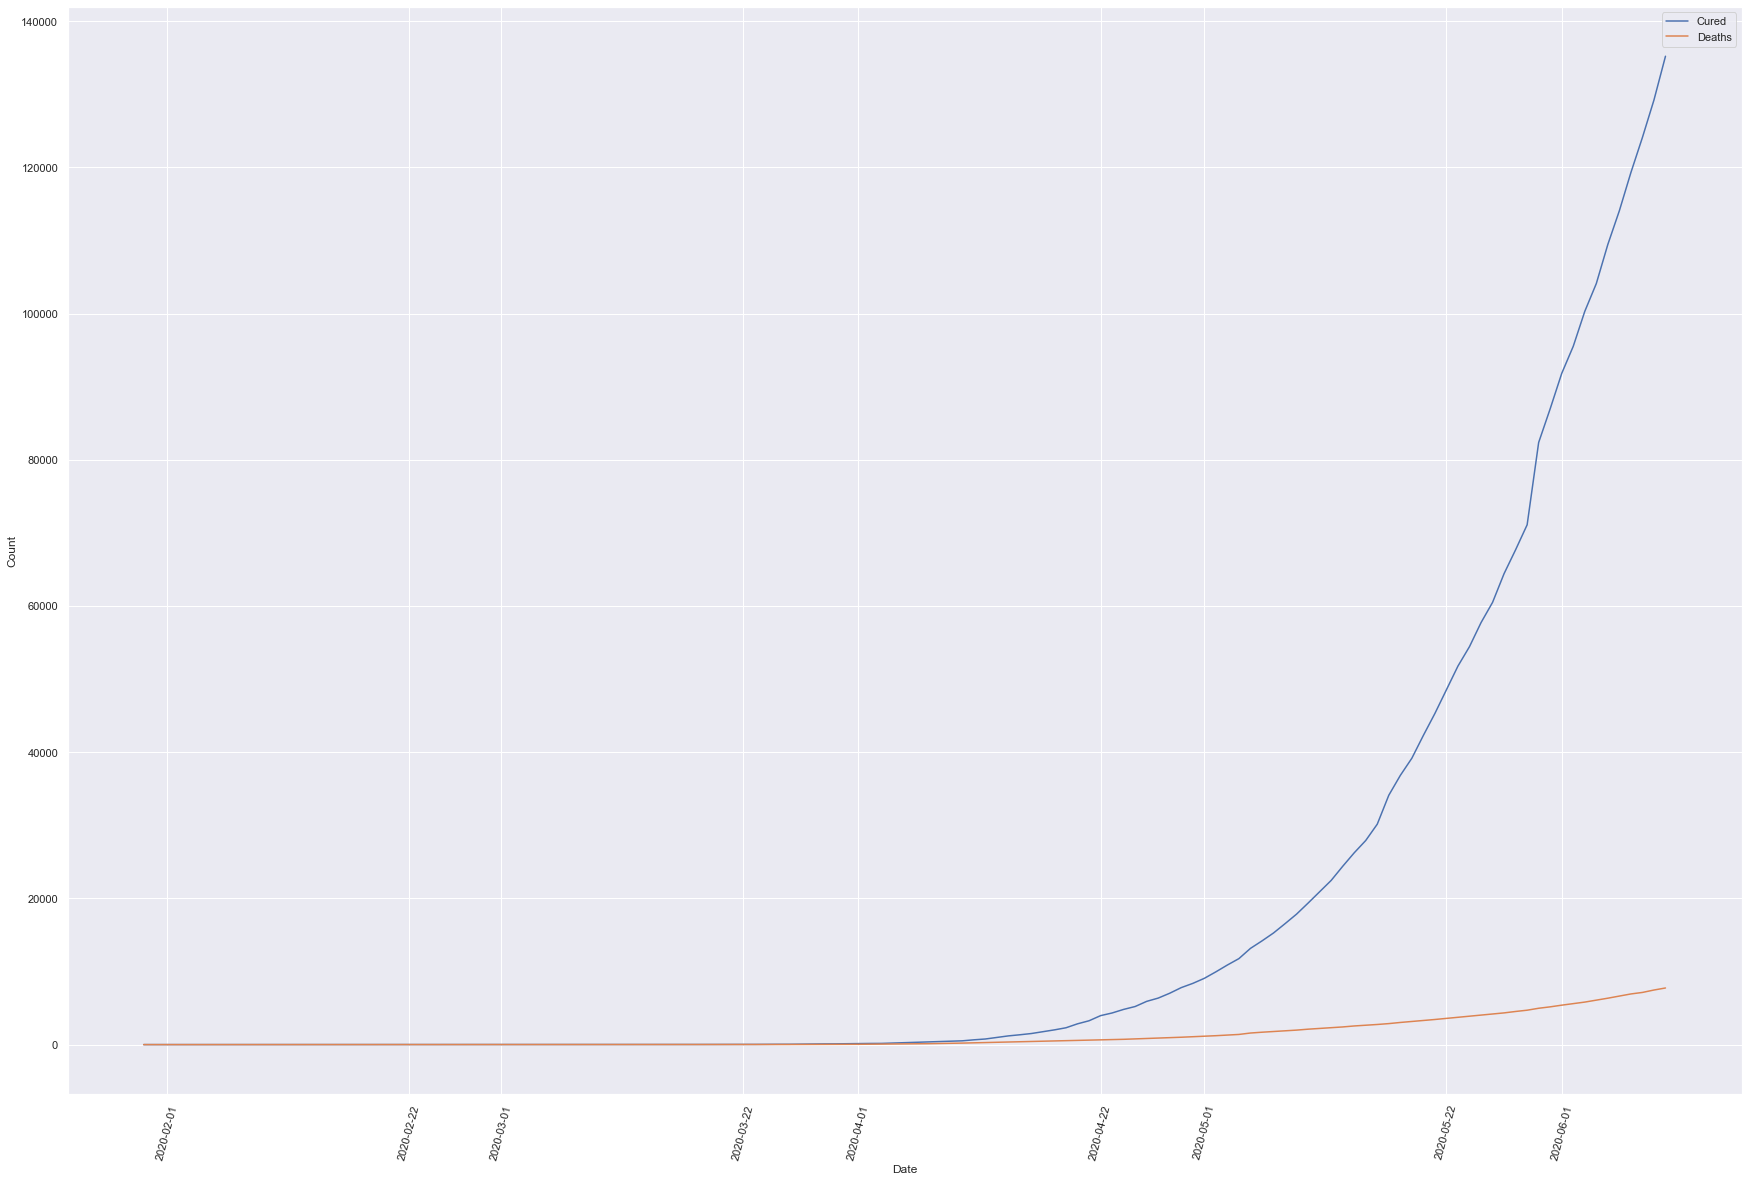

In [110]:
plt.figure(figsize=(30,20))
sns.lineplot(tmp["Date"],tmp["Cured"])
sns.lineplot(tmp["Date"],tmp["Deaths"])
plt.xlabel("Date")
plt.ylabel("Count")
plt.xticks(rotation=75)
plt.legend(["Cured","Deaths"])
plt.savefig('D:\Covid\image_6.png')

plt.show()


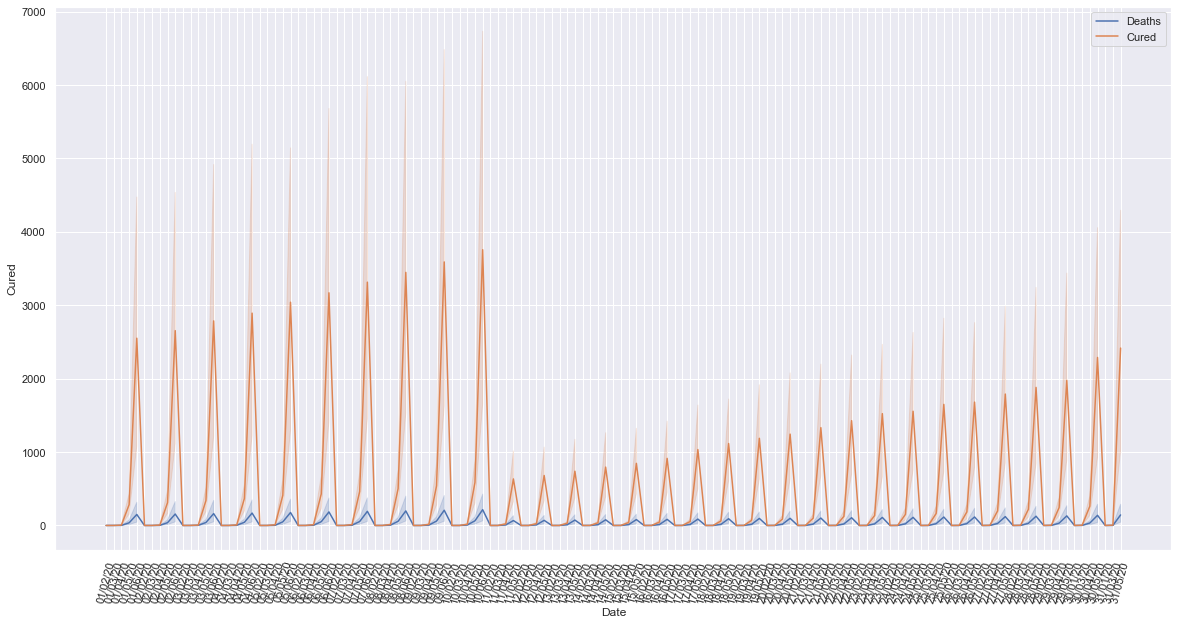

In [111]:
plt.figure(figsize=(20,10))
sns.lineplot(df_india["Date"],df_india["Deaths"])
# plt.bar(df_india["Date"],df_india["ConfirmedIndianNational"])
sns.lineplot(df_india["Date"],df_india["Cured"])
plt.legend(["Deaths","Cured"])
plt.xticks(rotation=75)
plt.savefig('D:\Covid\image_7.png')

plt.show()

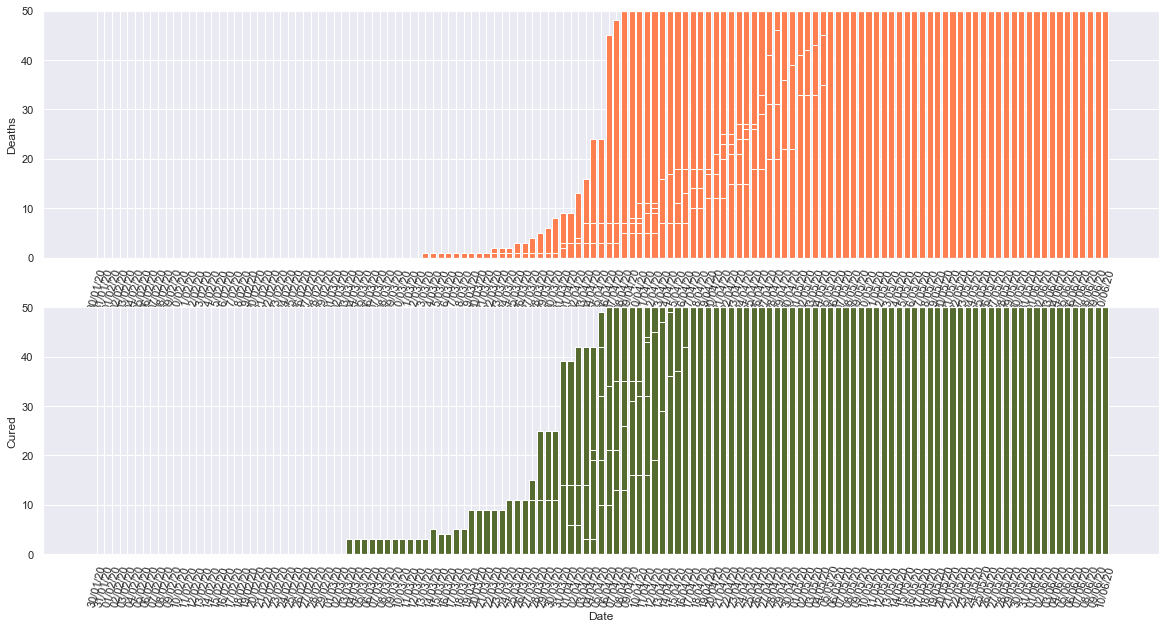

In [112]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.bar(df_india["Date"],df_india["Deaths"],color='coral')
# plt.bar(df_india["Date"],df_india["ConfirmedIndianNational"])
plt.xticks(rotation=75)
plt.ylim(0, 50)
plt.xlabel("Date")
plt.ylabel("Deaths")

plt.subplot(2,1,2)
plt.bar(df_india["Date"],df_india["Cured"],color='darkolivegreen')
plt.xlabel("Date")
plt.ylabel("Cured")
plt.ylim(0, 50)

plt.xticks(rotation=75)
plt.savefig('D:\Covid\image_8.png')

plt.show()

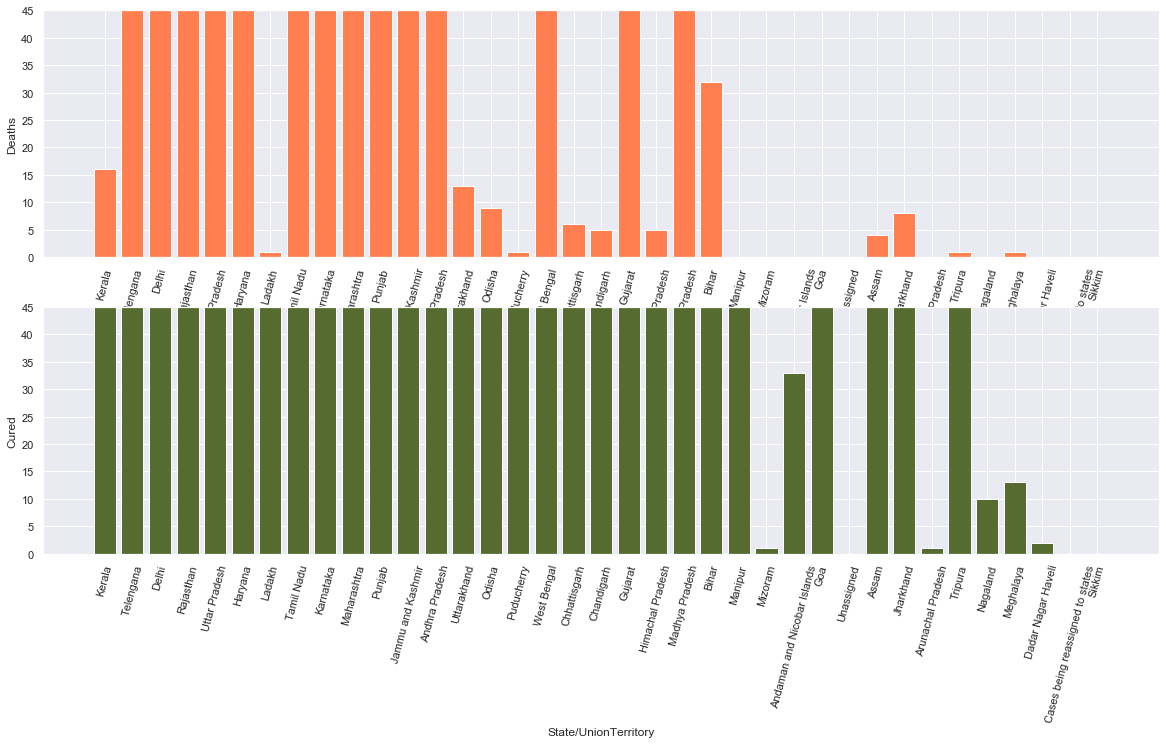

In [113]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.bar(df_india["State/UnionTerritory"],df_india["Deaths"],color='coral')
# plt.bar(df_india["Date"],df_india["ConfirmedIndianNational"])
plt.xticks(rotation=75)
plt.ylim(0, 45)
plt.xlabel("State/UnionTerritory")
plt.ylabel("Deaths")

plt.subplot(2,1,2)
plt.bar(df_india["State/UnionTerritory"],df_india["Cured"],color='darkolivegreen')
plt.xlabel("State/UnionTerritory")
plt.ylabel("Cured")
plt.ylim(0, 45)

plt.xticks(rotation=75)
plt.savefig('D:\Covid\image_9.png')

plt.show()


In [49]:
df_individual = pd.read_csv("IndividualDetails.csv")

In [50]:
df_individual.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


In [51]:
df_individual['gender']=df_individual['gender'].fillna("UNK")

In [52]:
df_individual["age"] = df_individual["age"].fillna(0)
df_individual["age"] = df_individual['age'].replace('28-35',32)

In [53]:
df_individual['diagnosed_date']=pd.to_datetime(df_individual['diagnosed_date'],dayfirst=True,infer_datetime_format=True)

In [54]:
df_individual['current_status'].value_counts()

Hospitalized    27953
Recovered         182
Deceased           46
Migrated            1
Name: current_status, dtype: int64

In [55]:

df_individual.isnull().sum()

id                        0
government_id         25185
diagnosed_date            0
age                       0
gender                    0
detected_city         25832
detected_district      6984
detected_state            0
nationality           25473
current_status            0
status_change_date      402
notes                  1335
dtype: int64

In [56]:
df_individual[df_individual['detected_state'].isnull()]

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes


In [57]:
df_individual['gender'].value_counts()

UNK    22869
M       3547
F       1766
Name: gender, dtype: int64

In [58]:
df_individual_tmp = df_individual

In [59]:
df_individual_tmp.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,2020-01-30,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,2020-02-02,0,UNK,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,2020-02-03,0,UNK,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,2020-03-02,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,2020-03-02,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


In [60]:
df_individual_tmp["age"].value_counts()

0      25836
35        89
32        74
40        63
30        60
       ...  
0.3        1
0.4        1
1.5        1
98         1
92         1
Name: age, Length: 93, dtype: int64

In [61]:
df_individual_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28182 entries, 0 to 28181
Data columns (total 12 columns):
id                    28182 non-null int64
government_id         2997 non-null object
diagnosed_date        28182 non-null datetime64[ns]
age                   28182 non-null object
gender                28182 non-null object
detected_city         2350 non-null object
detected_district     21198 non-null object
detected_state        28182 non-null object
nationality           2709 non-null object
current_status        28182 non-null object
status_change_date    27780 non-null object
notes                 26847 non-null object
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 2.6+ MB


In [63]:
deceased_age = df_individual_tmp[df_individual_tmp["current_status"]=='Deceased']

In [66]:
df_individual['gender'].value_counts()/len(df_individual['gender'])*100

UNK    81.147541
M      12.586048
F       6.266411
Name: gender, dtype: float64

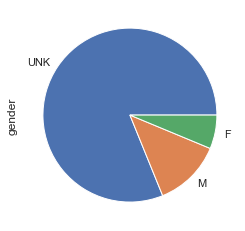

In [67]:
df_individual['gender'].value_counts().plot(kind='pie')

In [69]:
df_individual_tmp['diagnosed_date']=pd.to_datetime(df_individual_tmp['diagnosed_date'],dayfirst=True,infer_datetime_format=True)

In [70]:
df_individual_tmp['current_status'].value_counts()

Hospitalized    27953
Recovered         182
Deceased           46
Migrated            1
Name: current_status, dtype: int64

In [71]:
deaths_state=df_individual_tmp['detected_state'][df_individual_tmp['current_status']=='Deceased'].value_counts()

In [72]:
deaths_state=dict(deaths_state)

In [73]:
df_age_group.head(20)

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%
5,6,50-59,77,11.13%
6,7,60-69,89,12.86%
7,8,70-79,28,4.05%
8,9,>=80,10,1.45%
9,10,Missing,9,1.30%


In [74]:
df_age_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Sno           10 non-null int64
AgeGroup      10 non-null object
TotalCases    10 non-null int64
Percentage    10 non-null object
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


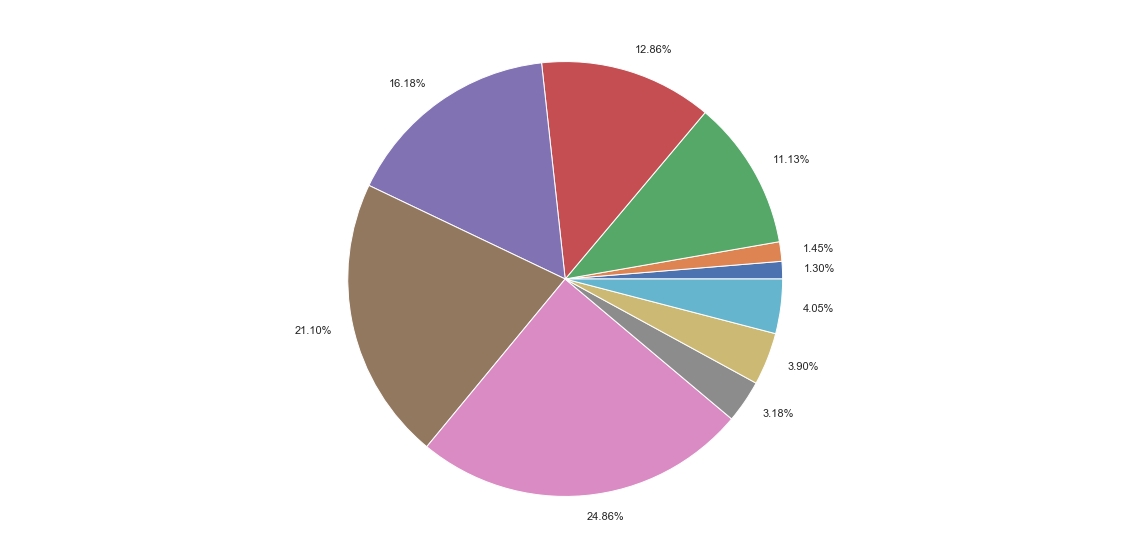

In [75]:
from matplotlib.pyplot import pie, axis
plt.figure(figsize=(20,10))
# fig1,ax1 = plt.subplots()
# ax1.pie(df_age_group['TotalCases'],df_age_group['AgeGroup'], shadow=True)

sums = df_age_group.groupby(df_age_group["Percentage"])["TotalCases"].sum()
axis('equal');
pie(sums, labels=sums.index);


# ax1.equal()
plt.show()

In [80]:
df_imcrt.head()

,Unnamed: 0,day,totalSamplesTested,totalPositiveCases,Source,positive_ratio,perday_positive,perday_tests
0,1,13/03/2020,6500.0,81.0,Press_Release_ICMR_13March2020.pdf,0.11,7.0,6500.0
1,2,18/03/2020,13125.0,151.0,ICMR_website_update_18March_6PM_IST.pdf,1.06,70.0,6625.0
2,3,19/03/2020,14175.0,173.0,ICMR_website_update_19March_6PM_IST.pdf,2.10,22.0,1050.0
3,4,20/03/2020,15404.0,223.0,ICMR_website_update_20March_6PM_IST.pdf,4.07,50.0,1229.0
4,5,21/03/2020,16911.0,283.0,ICMR_website_update_21March_6PM_IST.pdf,3.98,60.0,1507.0


In [81]:
df_imcrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
Unnamed: 0            70 non-null int64
day                   51 non-null object
totalSamplesTested    51 non-null float64
totalPositiveCases    51 non-null float64
Source                34 non-null object
positive_ratio        51 non-null float64
perday_positive       51 non-null float64
perday_tests          51 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 4.5+ KB


In [83]:
df_imcrt['DateTime']= pd.to_datetime(df_imcrt['day'],infer_datetime_format=True,dayfirst=True)

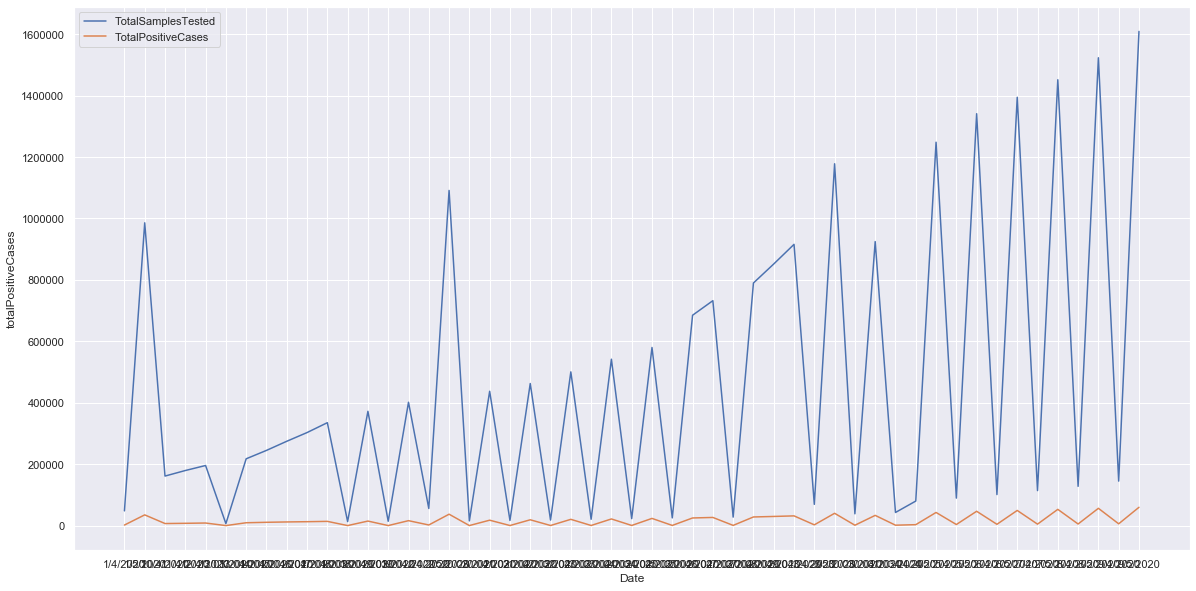

In [114]:
plt.figure(figsize=(20,10))
sns.lineplot(df_imcrt['day'],df_imcrt['totalSamplesTested'])

sns.lineplot(df_imcrt['day'],df_imcrt['totalPositiveCases'])
plt.legend(["TotalSamplesTested","TotalPositiveCases"])
plt.xlabel("Date")
plt.savefig('D:\Covid\image_10.png')
plt.show()

In [88]:
df_population.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [90]:
df_hospital_bed

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,3,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936
5,6,Chandigarh,40,2,1.0,4,47,3756,0,0,4,778
6,7,Chhattisgarh,813,166,12.0,32,1023,14354,169,5070,45,4342
7,8,Dadra & Nagar Haveli,9,2,1.0,1,13,568,10,273,1,316
8,9,Daman & Diu,4,2,NaN,2,8,298,5,240,0,0
9,10,Delhi,534,25,9.0,47,615,20572,0,0,109,24383


In [92]:
recent_date = df_india['Date'].max()
mortality_statewise = df_india[df_india['Date']==recent_date]

In [93]:
mortality_statewise.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
2486,2487,31/05/20,8:00 AM,Andaman and Nicobar Islands,-,-,33,0,33
2487,2488,31/05/20,8:00 AM,Andhra Pradesh,-,-,2289,60,3569
2488,2489,31/05/20,8:00 AM,Arunachal Pradesh,-,-,1,0,4
2489,2490,31/05/20,8:00 AM,Assam,-,-,163,4,1185
2490,2491,31/05/20,8:00 AM,Bihar,-,-,1618,20,3636


In [95]:
mortality_statewise['Mortality_Rate']=(mortality_statewise['Deaths']/mortality_statewise['Confirmed'])*100

E:\Anaconda1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
mortality_statewise['Recovery_Rate']=(mortality_statewise['Cured']/mortality_statewise['Confirmed'])*100

E:\Anaconda1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [97]:
mortality_statewise.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Mortality_Rate,Recovery_Rate
2486,2487,31/05/20,8:00 AM,Andaman and Nicobar Islands,-,-,33,0,33,0.000000,100.000000
2487,2488,31/05/20,8:00 AM,Andhra Pradesh,-,-,2289,60,3569,1.681143,64.135612
2488,2489,31/05/20,8:00 AM,Arunachal Pradesh,-,-,1,0,4,0.000000,25.000000
2489,2490,31/05/20,8:00 AM,Assam,-,-,163,4,1185,0.337553,13.755274
2490,2491,31/05/20,8:00 AM,Bihar,-,-,1618,20,3636,0.550055,44.499450


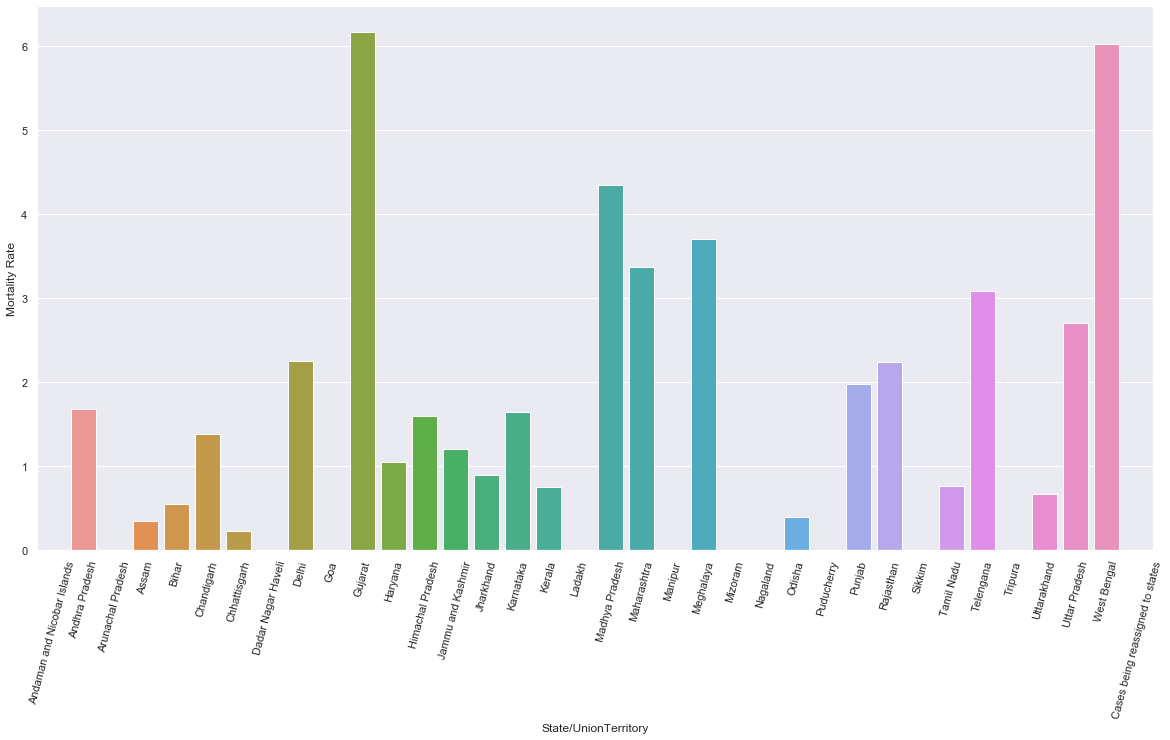

In [115]:
plt.figure(figsize=(20,10))
sns.barplot(mortality_statewise['State/UnionTerritory'],mortality_statewise['Mortality_Rate'])
plt.xlabel("State/UnionTerritory")
plt.ylabel("Mortality Rate")
plt.xticks(rotation=75)
plt.savefig('D:\Covid\image_11.png')
plt.show()

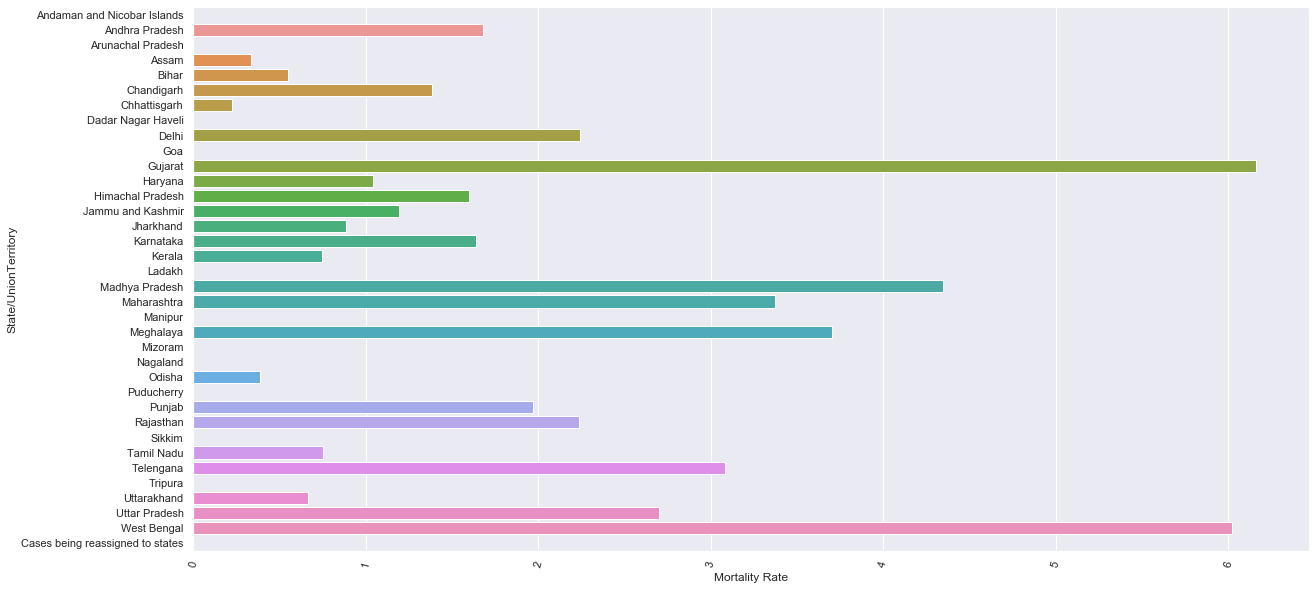

In [116]:

plt.figure(figsize=(20,10))
sns.barplot(mortality_statewise['Mortality_Rate'],mortality_statewise['State/UnionTerritory'])
plt.ylabel("State/UnionTerritory")
plt.xlabel("Mortality Rate")
plt.xticks(rotation=75)
plt.savefig('D:\Covid\image_12.png')
plt.show()

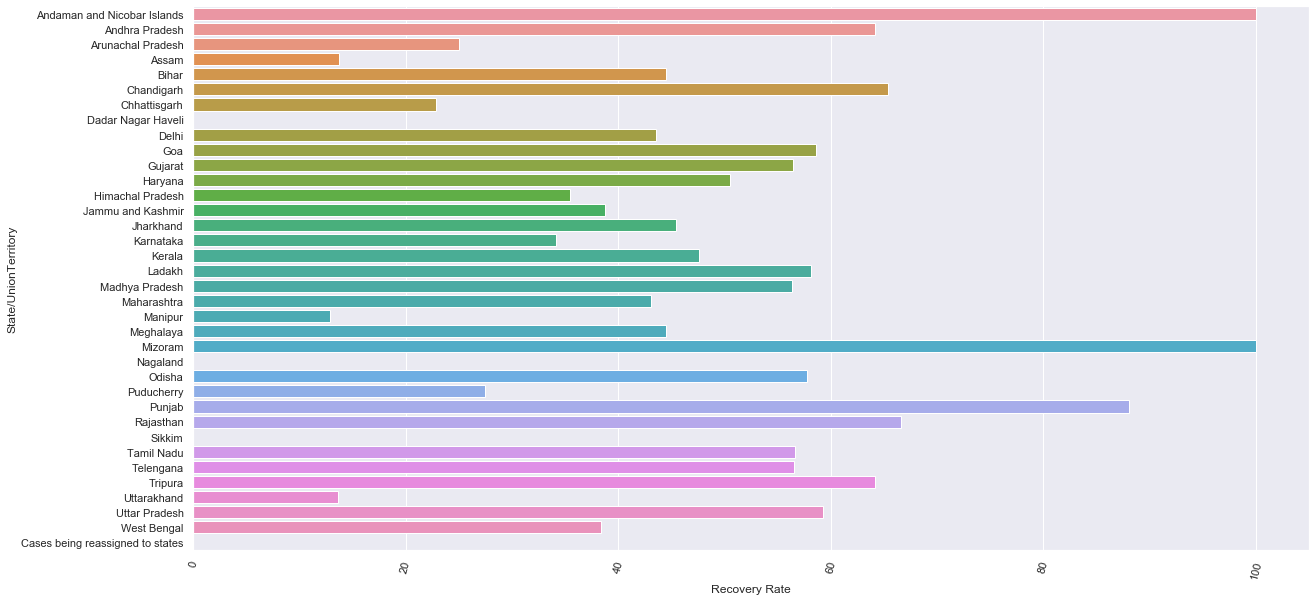

In [117]:
plt.figure(figsize=(20,10))
sns.barplot(mortality_statewise['Recovery_Rate'],mortality_statewise['State/UnionTerritory'])
plt.ylabel("State/UnionTerritory")
plt.xlabel("Recovery Rate")
plt.xticks(rotation=75)
plt.savefig('D:\Covid\image_13.png')
plt.show()


In [101]:
tmp['Mortality_Rate']=(tmp['Deaths']/tmp['Confirmed'])*100
tmp['Recovery_Rate']=(tmp['Cured']/tmp['Confirmed'])*100

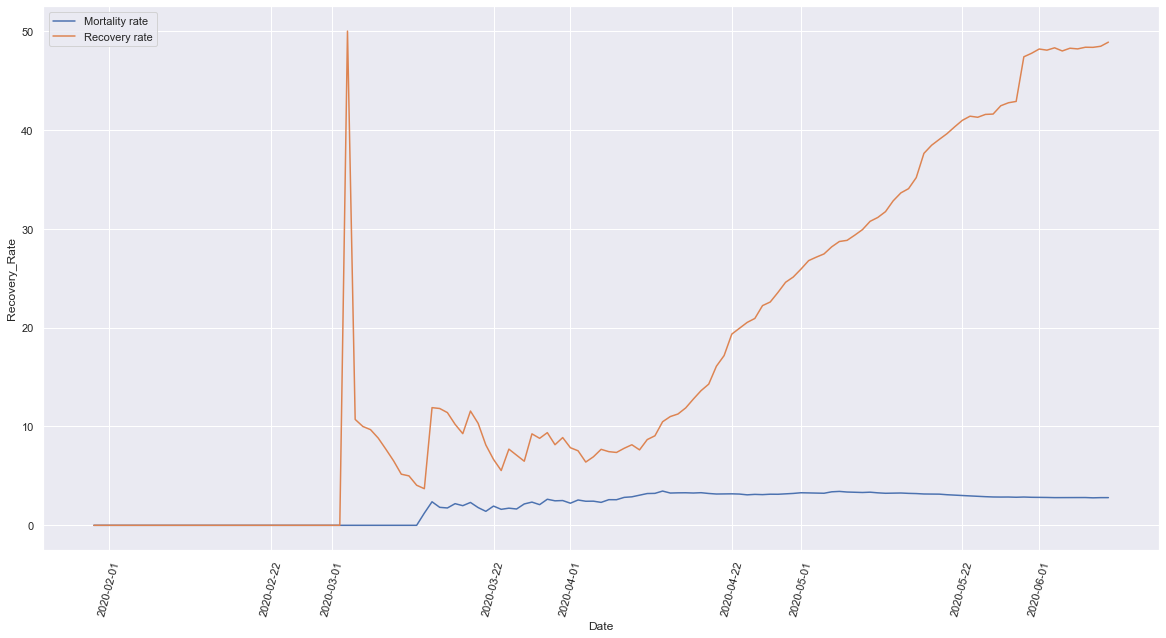

In [118]:
plt.figure(figsize=(20,10))
# plt.subplot(2,1,1)
sns.lineplot(tmp['Date'],tmp['Mortality_Rate'])
# plt.xlabel('Date')
# plt.ylabel('Deaths')
# plt.xticks(rotation=75)

# plt.subplot(2,1,2)

sns.lineplot(tmp['Date'],tmp['Recovery_Rate'])
plt.xticks(rotation=75)
plt.xlabel('Date')
plt.legend(['Mortality rate','Recovery rate'])

# plt.ylabel('Cured')
plt.savefig('D:\Covid\image_14.png')
plt.show()